<h1 align='center' style='color:purple'><b>K-Nearest Neighbour</b></h1>

K-Nearest Neighbour is one of the simplest Machine Learning algorithms. KNN finds out the similarity between the new data & available data and put the new case into a category that is most similar to the available categories.

KNN is also called a lazy learner algorithm, as it does not learn from the training data immediately instead it stores the dataset and at the time of prediction, it performs an action on the dataset.

 - It is a Supervised Learning Algorithm which can be used for both classification and regression problems.
 - It can also handle non-linear data which was not possible in case of linear models
 
Advantages :
 - Easy to Implement
 - No Training Period : As the data itself is a model which will be later used as a reference for prediction.
 
Disadvantages :
 - Data needs to be scaled.
 - Sensitive to missing Data.
 - does not work well with Large Dataset.

<b>Import Necessary Libraries</b>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Get the data

Use index_col=0 to set the 1st column as index

In [6]:
path = "C:/Users/dell/Downloads/Classified_Data.csv"
df = pd.read_csv(path,index_col=0)
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


# Standardize the variables

Because the KNN predicts the class of the given test-instance by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.

In [7]:
from sklearn.preprocessing import StandardScaler

<b> Initialize and fit Standard Scaler</b>

In [8]:
scaler = StandardScaler()
scaler.fit(df.drop('TARGET CLASS', axis=1))

<b>Standardize the inputs (independent variables) </b>

In [10]:
scaled_features = scaler.transform(df.drop('TARGET CLASS', axis=1))

In [12]:
df_feat = pd.DataFrame(scaled_features, columns=df.columns[:-1])
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


# Train-test split

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['TARGET CLASS'],test_size=0.30)

# Using KNN

Remember that we are trying to come up with a model to predict the TARGET CLASS. We will start with k=1

In [15]:
# Import KNN Classifier
from sklearn.neighbors import KNeighborsClassifier

In [17]:
# Initialize and Train  KNN Classifier
knn= KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

<b> Make predictions for the Testing Data</b>

In [18]:
pred = knn.predict(X_test)

# Model Performance Evaluation

- [confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) : Compute confusion matrix to evaluate the accuracy of a classification. By definition a confusion matrix C is such that Cᵢ,ⱼ is equal to the number of observations known to be in group i and predicted to be in group j. Thus in binary classification, the count of true negatives is C₀,₀, false negatives is C₁,₀, true positives is C₁,₁ and false positives is C₀,₁.
   - TN / True Negative: Actual negative and predicted negative
   - TP / True Positive: Actual positive and predicted positive
   - FN / False Negative: Actual positive but predicted negative
   - FP / False Positive: Actual negative but predicted positive

- [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) : The classification report displays the accuracy, precision, recall, F1, and support scores for the model.

   - Accuracy - Total correct predictions divided by the total number of records in dataset.
   - Precision - What proportion of positive predictions were actually correct?
   - Recall - What percent of the positive cases did you catch?
   - F1 score - Harmonic mean of precision and recall. It is useful metric when you're trying to balance precision & recall
   - Support - The number of actual occurrences of the class in the dataset.

In [19]:
from sklearn.metrics import classification_report, confusion_matrix

In [20]:
print('Confusion Matrix')
print(confusion_matrix(y_test,pred))

[[131  16]
 [ 14 139]]


So, True Negative = 131, True Positive = 139, False Positive = 16, False Negative = 14

In [21]:
print('Classification Report')
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.90      0.89      0.90       147
           1       0.90      0.91      0.90       153

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300



<b>From Above Classification report, Some Observations :</b>
 - Support of class 0 = 147 and class 1 = 153.
   - This means that there are 147 negatives (0) and 153 positives (1)  present in Target.
 - Precision for both target class (0 and 1) is 90%.
   - with reference to positive class : whenever our model predicts 1 or positive, 90 % of times it is True.
 - Recall for class 0 is 0.89 and for class 1 is 0.91.
   - This means model was able to predict 89 % of negatives out of total 147 negatives.
   - The model was able to predict 91 % of positives out of total 153 positives.
 - F1-score which is the harmonic mean of precision and recall was equal to 0.9 for both classes.   

# Choosing the optimum K value
By deafult the value of nearest neighbours(k) is 5. We tune this value as different value K works best in different case.

In [22]:
# Here we will check Error for k value in range of 1 to 40
error_rate= []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors= i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

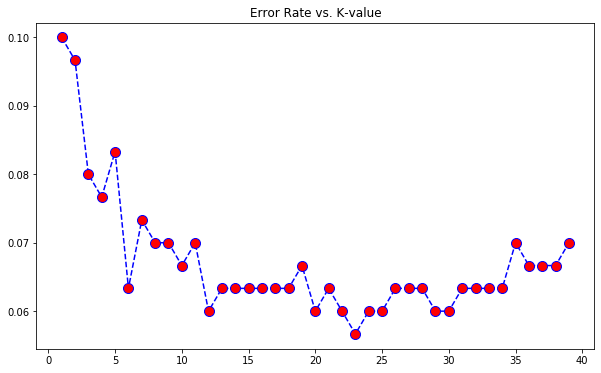

In [23]:
# Plot of Error vs K-value
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o', 
         markerfacecolor='red', markersize=10)
plt.title("Error Rate vs. K-value")
plt.xlabel('K-value')
plt.ylabel('Error_rate')


In [25]:
#WITH K=1(FOR COMPARISON)
knn = KNeighborsClassifier(n_neighbors= 1)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

WITH K=1


[[131  16]
 [ 14 139]]
              precision    recall  f1-score   support

           0       0.90      0.89      0.90       147
           1       0.90      0.91      0.90       153

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300



In [24]:
#WITH K=23
knn = KNeighborsClassifier(n_neighbors= 23)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

print('WITH K=23')
print('\n')
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

WITH K=23


[[135  12]
 [  5 148]]
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       147
           1       0.93      0.97      0.95       153

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



<b>When K = 23, every Performance metric was slightly better than that of K = 1 case.</b>